<a href="https://colab.research.google.com/github/FrancescoMusi/Laboratory-of-machine-learning-and-advanced-computing-for-physics/blob/main/4_Binary_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary linear classification

Use the following (almost) linearly separable dataset to perform the different instructions below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a linearly separable dataset
def generate_dataset():
    np.random.seed(42)
    n_points = 100
    x1 = np.random.randn(n_points, 2) + np.array([1, 2])
    x2 = np.random.randn(n_points, 2) + np.array([-1, -2])
    y1 = np.ones(n_points)
    y2 = -np.ones(n_points)
    X = np.vstack((x1, x2))
    y = np.hstack((y1, y2))
    return X, y

X, y = generate_dataset()

### Imports and Dataset Generation

This cell sets up our environment and creates the data we'll use for training.

`def generate_dataset()`: This function defines the process for creating our dataset.
    
* `np.random.seed(42)`: This line fixes the "random seed." It ensures that every time we run this code, the *same* random numbers are generated, making our results **reproducible**.
* `x1 = ... + np.array([1, 2])`: This creates the first cluster of 100 2D points.
* `np.random.randn(n_points, 2)` generates points from a standard normal distribution (mean 0, variance 1). We then shift the center of this "cloud" of points to the coordinates `[1, 2]`.
* `x2 = ... + np.array([-1, -2])`: This creates the second cluster of 100 2D points, centered at `[-1, -2]`.
* `y1 = np.ones(n_points)` / `y2 = -np.ones(n_points)`: This creates the labels (targets) for our classes. We use `+1` for the first class and `-1` for the second. This `+1/-1` encoding is crucial for the Logistic Loss formula we will use later.
* `X = np.vstack(...)`: This "vertically stacks" the two arrays of points (`x1` and `x2`) into a single `(200, 2)` matrix called `X`.
* `y = np.hstack(...)`: This "horizontally stacks" the two label arrays (`y1` and `y2`) into a single `(200,)` vector called `y`.
* `X, y = generate_dataset()`: Finally, we call the function and store the results in `X` (our features) and `y` (our labels).


1. Augment input features with ones to allow for intercept

In [2]:
def augment_inputs(X):
    return np.hstack((X, np.ones((X.shape[0], 1))))

### Augment Input Features

This cell implements the first required step: augmenting the feature matrix.

* **Theoretical Motivation**: Our goal is to find a linear decision boundary, which is a line described by the equation: $w_1 x_1 + w_2 x_2 + b = 0$. Here, $w_1$ and $w_2$ are the **weights**, and $b$ is the **bias** (or *intercept*).
    To simplify calculations, we can merge the bias $b$ into the weight vector $w$. We do this by adding a constant feature of `1` to every sample in `X`.
* Our feature vector $x = [x_1, x_2]$ becomes $\tilde{x} = [x_1, x_2, 1]$.
* Our weight vector $w = [w_1, w_2]$ becomes $\tilde{w} = [w_1, w_2, b]$. This technique, called "augmenting the input" (as seen in your theory notes, Sec 1.1.1), allows us to represent the model as a single matrix multiplication $z = \tilde{X}\tilde{w}$, which is computationally efficient.

* `np.ones((X.shape[0], 1))`: Creates a new array (a column vector) containing `1`s. `X.shape[0]` ensures it has the same number of rows as `X` (which is 200).
* `np.hstack((X, ...))`: This "horizontally stacks" the new column of ones to the right side of the original `X` matrix.
* The resulting matrix has the shape `(200, 3)`.


2. Define a Logistic Loss function

In [3]:
def logistic_loss(w, X, y):
    z = X @ w
    log_likelihood = np.log(1 + np.exp(-y * z))
    return np.mean(log_likelihood)

### Define Logistic Loss Function

This cell defines our **cost function** (or *objective function*). This function measures how "wrong" our model's predictions are. The goal of training is to find the set of weights `w` that minimizes this function.

* **Theoretical Motivation**: We are using the **Logistic Loss** function, which is ideal for binary classification. As shown in your theory notes (Sec 2.1.1, Eq. 2.8), the formula for a single sample $i$ is: $l_i^{(\text{logistic})} = \ln(1 + e^{-y_i \cdot z_i})$

* $z_i = \tilde{x}_i^T \tilde{w}$ is the raw output (or *logit*) from the model. Its sign determines the predicted class.
* $y_i$ is the true label (`+1` or `-1`).
* The product $y_i \cdot z_i$ is the key.
* If the prediction is **correct** (e.g., $y=1, z=2.5$), the product is positive. $e^{-(\text{positive})}$ is a small number, so the loss $\ln(1 + \text{small})$ is close to `0`.
* If the prediction is **wrong** (e.g., $y=1, z=-1.8$), the product is negative. $^{-(\text{negative})}$ is a large number, so the loss $\ln(1 + \text{large})$ is a large positive value, penalizing the error. This loss function is derived from the **Negative Log-Likelihood (NLL)** of the data, assuming a sigmoid probability model.
                                        
* `def logistic_loss(w, X, y)`: Defines the function that takes the current weights `w`, augmented features `X`, and labels `y`.
* `z = X @ w`: This is the matrix multiplication $\tilde{X}\tilde{w}$. It efficiently calculates the logit $z$ for *all* 200 samples at once.
* `log_likelihood = np.log(1 + np.exp(-y * z))`: This is the direct, vectorized implementation of Eq. (2.8). NumPy applies the multiplication, exponent, log, and addition element-wise for every sample.
* `return np.mean(log_likelihood)`: We return the *average* loss over the entire dataset. This is the value we will ask the optimizer to minimize.


3. Train the model using your favorite minimizer, e.g.
`from scipy.optimize import minimize`



In [4]:
from scipy.optimize import minimize

def train_model(X, y):
    X_aug = augment_inputs(X)
    initial_w = np.zeros(X_aug.shape[1])
    result = minimize(logistic_loss, initial_w, args=(X_aug, y), method='BFGS')
    return result.x # the x attribute is the solution array

w = train_model(X, y)

### Train the Model

This cell performs the actual "training" by finding the optimal `w` vector that minimizes the `logistic_loss` function.

* **Theoretical Motivation**:
    * Unlike simple Linear Regression (which has a direct analytical solution, the *Normal Equation*), the Logistic Loss function does not. We must find the minimum using an iterative **numerical optimization algorithm**.
        * We import `minimize` from the `scipy.optimize` library, as suggested in the instruction.
        * The `method='BFGS'` (Broyden–Fletcher–Goldfarb–Shanno) is a *quasi-Newton* method[span_18](end_span)[span_19](end_span). [span_20](start_span)[span_21](start_span)It is a sophisticated optimization algorithm that uses an approximation of the second derivatives (the Hessian matrix) to find the minimum of the function much more efficiently than standard Gradient Descent (which only uses the first derivative)[span_20](end_span)[span_21](end_span).


* `from scipy.optimize import minimize`: Imports the specific function we need.
* `def train_model(X, y)`: Defines the training function.
* `X_aug = augment_inputs(X)`: First, we augment our feature matrix to include the bias term.
* `initial_w = np.zeros(X_aug.shape[1])`: We provide a starting guess for the optimizer. A vector of all zeros (`[0, 0, 0]`) is a standard, neutral starting point.
* `result = minimize(...)`: This line runs the optimization.
* `logistic_loss`: The function we want to minimize.
* `initial_w`: The starting point for `w`.
* `args=(X_aug, y)`: This passes the augmented data and labels as additional arguments to the `logistic_loss` function. The optimizer will only change `w`.
* `method='BFGS'`: Selects the BFGS optimization algorithm
* `return result.x`: The `minimize` function returns a `result` object. The optimal vector of weights $w = [w_1, w_2, b]$ is stored in the `.x` attribute of this object.
* `w = train_model(X, y)`: We call the function and store the final, trained weights in the variable `w`.

4. Predict labels of the dataset

In [5]:
def predict(X, w):
    X_aug = augment_inputs(X)
    z = X_aug @ w
    return np.sign(z)

y_pred = predict(X, w)

### Predict Labels

Now that we have our optimal weights `w`, this cell defines a function to make predictions for new data.

**Theoretical Motivation**: The model defines a decision boundary (a line) where $z = \tilde{x}^T \tilde{w} = 0$.
* For any point on one side of the line, $z$ will be positive. We assign this to **Class +1**.
* For any point on the other side, $z$ will be negative. We assign this to **Class -1**.

This is precisely what the `sign()` function does, as described in Sec 2.1.1.

* `def predict(X, w)`: Defines the prediction function, which takes new data `X` and our trained weights `w`.
* `X_aug = augment_inputs(X)`: It's crucial that we process the new data in the *exact same way* we processed the training data. This includes adding the column of ones for the bias.
* `z = X_aug @ w`: We calculate the logit $z$ using our trained weights.
* `return np.sign(z)`: We return the **sign** of the logit (`+1.0` or `-1.0`) as the final class prediction.
* `y_pred = predict(X, w)`: We call the function on our original data `X` to see how well the model learned to classify it.


5. Plot results and decision boundary line

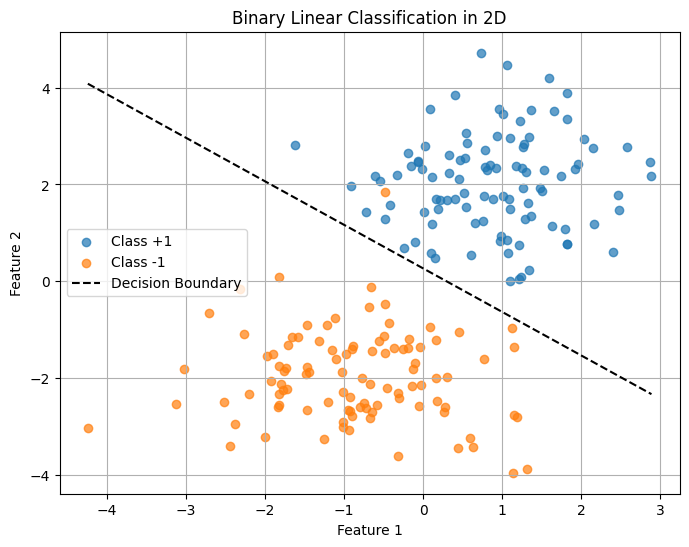

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class +1", alpha=0.7)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label="Class -1", alpha=0.7)

# Decision boundary
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + w[2]) / w[1]
plt.plot(x1_vals, x2_vals, 'k--', label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Binary Linear Classification in 2D")
plt.grid(True)
plt.show()

### Cell Explanation: 5. Plot Results and Decision Boundary

This final cell visualizes our results. It plots the original data points and overlays the **Decision Boundary** that our model has learned.

**Thoretical Motivation**: The decision boundary is the line where the model's output $z$ is exactly `0`. Our model's equation is: $z = w_0 \cdot x_1 + w_1 \cdot x_2 + w_2 \cdot 1 = 0$
(Note: the code's `w` array is `[w[0], w[1], w[2]]`, which correspond to $w_1$, $w_2$, and $b$ from our theory).

So, $w[0] \cdot x_1 + w[1] \cdot x_2 + w[2] = 0$.

To plot this line, we must express $x_2$ (the y-axis) as a function of $x_1$ (the x-axis): $w[1] \cdot x_2 = -w[0] \cdot x_1 - w[2]$
$x_2 = \frac{-(w[0] \cdot x_1 + w[2])}{w[1]}$
                                                                
                                                                
* `x1_vals = np.linspace(...)`: Creates a smooth range of $x_1$ values from the minimum to the maximum x-coordinate in our data.
                                                    
* `x2_vals = -(w[0] * x1_vals + w[2]) / w[1]`: This line is the *exact implementation* of the boundary equation we just derived. It calculates the corresponding $x_2$ value for each $x_1$ value

* `plt.plot(x1_vals, x2_vals, 'k--'...)`: Plots the `(x1, x2)` pairs as a black dashed line (`k--`). This is our learned classifier.